In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import variation

# Ratio Analysis from Excel

In [0]:
df = pd.read_excel('data.xlsx')

In [0]:
df

,symbol,date,currentRatio,grossProfitMargin,netProfitMargin,ROA,ROE,ROC,debtEquityRatio,netIncome,totalAssets,debtToAssets,quickRatio,cashRatio,No. of Employees,Income/ Employee,operatingProfitMargin
0,AAPL,2005-09-24,2.96,0.30,0.10,0.12,0.18,0.23,0.55,1335000000,11551000000,0.36,2.63,1.01,16820,79369.797860,0.120
1,AAPL,2006-09-30,2.25,0.30,0.10,0.08,0.14,0.17,0.73,1989000000,17205000000,0.42,1.76,0.99,20186,98533.637174,0.120
2,AAPL,2007-09-29,2.37,0.34,0.15,0.14,0.25,0.32,0.75,3496000000,25347000000,0.43,1.84,1.01,23700,147510.548523,0.190
3,AAPL,2008-09-27,2.47,0.35,0.15,0.13,0.23,0.28,0.89,4834000000,39572000000,0.47,1.91,0.85,35100,137720.797721,0.200
4,AAPL,2009-09-26,1.89,0.36,0.16,0.11,0.21,0.24,0.94,5704000000,53851000000,0.49,1.40,0.28,36800,155000.000000,0.210
5,AAPL,2010-09-25,2.02,0.40,0.22,0.19,0.30,0.35,0.58,14013000000,75183000000,0.37,1.51,0.55,49400,283663.967611,0.290
6,AAPL,2011-09-24,1.61,0.41,0.24,0.23,0.34,0.39,0.52,25922000000,116371000000,0.35,1.12,0.36,63300,409510.268562,0.320
7,AAPL,2012-09-29,1.50,0.44,0.27,0.24,0.36,0.41,0.49,41733000000,176064000000,0.33,1.04,0.28,76100,548396.846255,0.360
8,AAPL,2013-09-28,1.68,0.38,0.22,0.18,0.30,0.31,0.68,37037000000,207000000000,0.41,1.23,0.33,84400,438827.014218,0.290
9,AAPL,2014-09-27,1.09,0.39,0.22,0.18,0.36,0.32,1.08,39510000000,231839000000,0.52,0.68,0.22,97000,407319.587629,0.290


### Reordering df and sorting by date

In [0]:
#df['date'] = pd.to_datetime(df['date'])
#df = df.sort_values(by=['date'])
#df

In [0]:
df['date'] = pd.DatetimeIndex(df['date']).year
df

,symbol,date,currentRatio,grossProfitMargin,netProfitMargin,ROA,ROE,ROC,debtEquityRatio,netIncome,totalAssets,debtToAssets,quickRatio,cashRatio,No. of Employees,Income/ Employee,operatingProfitMargin
0,AAPL,2005,2.96,0.30,0.10,0.12,0.18,0.23,0.55,1335000000,11551000000,0.36,2.63,1.01,16820,79369.797860,0.120
1,AAPL,2006,2.25,0.30,0.10,0.08,0.14,0.17,0.73,1989000000,17205000000,0.42,1.76,0.99,20186,98533.637174,0.120
2,AAPL,2007,2.37,0.34,0.15,0.14,0.25,0.32,0.75,3496000000,25347000000,0.43,1.84,1.01,23700,147510.548523,0.190
3,AAPL,2008,2.47,0.35,0.15,0.13,0.23,0.28,0.89,4834000000,39572000000,0.47,1.91,0.85,35100,137720.797721,0.200
4,AAPL,2009,1.89,0.36,0.16,0.11,0.21,0.24,0.94,5704000000,53851000000,0.49,1.40,0.28,36800,155000.000000,0.210
5,AAPL,2010,2.02,0.40,0.22,0.19,0.30,0.35,0.58,14013000000,75183000000,0.37,1.51,0.55,49400,283663.967611,0.290
6,AAPL,2011,1.61,0.41,0.24,0.23,0.34,0.39,0.52,25922000000,116371000000,0.35,1.12,0.36,63300,409510.268562,0.320
7,AAPL,2012,1.50,0.44,0.27,0.24,0.36,0.41,0.49,41733000000,176064000000,0.33,1.04,0.28,76100,548396.846255,0.360
8,AAPL,2013,1.68,0.38,0.22,0.18,0.30,0.31,0.68,37037000000,207000000000,0.41,1.23,0.33,84400,438827.014218,0.290
9,AAPL,2014,1.09,0.39,0.22,0.18,0.36,0.32,1.08,39510000000,231839000000,0.52,0.68,0.22,97000,407319.587629,0.290


### Converting money in billions

In [0]:
df['netIncome'] = df['netIncome'] / 1000000000
df['totalAssets'] = df['totalAssets']/ 1000000000
df

,symbol,date,currentRatio,grossProfitMargin,netProfitMargin,ROA,ROE,ROC,debtEquityRatio,netIncome,totalAssets,debtToAssets,quickRatio,cashRatio,No. of Employees,Income/ Employee,operatingProfitMargin
0,AAPL,2005,2.96,0.30,0.10,0.12,0.18,0.23,0.55,1.335,11.551,0.36,2.63,1.01,16820,79369.797860,0.120
1,AAPL,2006,2.25,0.30,0.10,0.08,0.14,0.17,0.73,1.989,17.205,0.42,1.76,0.99,20186,98533.637174,0.120
2,AAPL,2007,2.37,0.34,0.15,0.14,0.25,0.32,0.75,3.496,25.347,0.43,1.84,1.01,23700,147510.548523,0.190
3,AAPL,2008,2.47,0.35,0.15,0.13,0.23,0.28,0.89,4.834,39.572,0.47,1.91,0.85,35100,137720.797721,0.200
4,AAPL,2009,1.89,0.36,0.16,0.11,0.21,0.24,0.94,5.704,53.851,0.49,1.40,0.28,36800,155000.000000,0.210
5,AAPL,2010,2.02,0.40,0.22,0.19,0.30,0.35,0.58,14.013,75.183,0.37,1.51,0.55,49400,283663.967611,0.290
6,AAPL,2011,1.61,0.41,0.24,0.23,0.34,0.39,0.52,25.922,116.371,0.35,1.12,0.36,63300,409510.268562,0.320
7,AAPL,2012,1.50,0.44,0.27,0.24,0.36,0.41,0.49,41.733,176.064,0.33,1.04,0.28,76100,548396.846255,0.360
8,AAPL,2013,1.68,0.38,0.22,0.18,0.30,0.31,0.68,37.037,207.000,0.41,1.23,0.33,84400,438827.014218,0.290
9,AAPL,2014,1.09,0.39,0.22,0.18,0.36,0.32,1.08,39.510,231.839,0.52,0.68,0.22,97000,407319.587629,0.290


### Division of data for different companies

In [0]:
df.symbol.unique()

array(['AAPL', 'AMZN', 'MSFT'], dtype=object)

In [0]:
aapl = df[df.symbol == 'AAPL']
aapl

,symbol,date,currentRatio,grossProfitMargin,netProfitMargin,ROA,ROE,ROC,debtEquityRatio,netIncome,totalAssets,debtToAssets,quickRatio,cashRatio,No. of Employees,Income/ Employee,operatingProfitMargin
0,AAPL,2005,2.96,0.30,0.10,0.12,0.18,0.23,0.55,1.335,11.551,0.36,2.63,1.01,16820,79369.797860,0.12
1,AAPL,2006,2.25,0.30,0.10,0.08,0.14,0.17,0.73,1.989,17.205,0.42,1.76,0.99,20186,98533.637174,0.12
2,AAPL,2007,2.37,0.34,0.15,0.14,0.25,0.32,0.75,3.496,25.347,0.43,1.84,1.01,23700,147510.548523,0.19
3,AAPL,2008,2.47,0.35,0.15,0.13,0.23,0.28,0.89,4.834,39.572,0.47,1.91,0.85,35100,137720.797721,0.20
4,AAPL,2009,1.89,0.36,0.16,0.11,0.21,0.24,0.94,5.704,53.851,0.49,1.40,0.28,36800,155000.000000,0.21
5,AAPL,2010,2.02,0.40,0.22,0.19,0.30,0.35,0.58,14.013,75.183,0.37,1.51,0.55,49400,283663.967611,0.29
6,AAPL,2011,1.61,0.41,0.24,0.23,0.34,0.39,0.52,25.922,116.371,0.35,1.12,0.36,63300,409510.268562,0.32
7,AAPL,2012,1.50,0.44,0.27,0.24,0.36,0.41,0.49,41.733,176.064,0.33,1.04,0.28,76100,548396.846255,0.36
8,AAPL,2013,1.68,0.38,0.22,0.18,0.30,0.31,0.68,37.037,207.000,0.41,1.23,0.33,84400,438827.014218,0.29
9,AAPL,2014,1.09,0.39,0.22,0.18,0.36,0.32,1.08,39.510,231.839,0.52,0.68,0.22,97000,407319.587629,0.29


In [0]:
amzn = df[df.symbol == 'AMZN']
amzn

,symbol,date,currentRatio,grossProfitMargin,netProfitMargin,ROA,ROE,ROC,debtEquityRatio,netIncome,totalAssets,debtToAssets,quickRatio,cashRatio,No. of Employees,Income/ Employee,operatingProfitMargin
15,AMZN,2005,1.52,0.25,0.05,0.10,1.46,0.25,15.03,0.359,3.696,1.00,1.18,0.53,12000,29916.666667,0.006
16,AMZN,2006,1.34,0.23,0.02,0.05,0.45,0.21,10.13,0.190,4.363,1.00,0.96,0.41,13900,13669.064748,0.001
17,AMZN,2007,1.40,0.23,0.04,0.08,0.40,0.24,5.42,0.476,6.485,1.00,1.03,0.69,17000,28000.000000,0.045
18,AMZN,2008,1.30,0.23,0.04,0.08,0.25,0.26,3.12,0.645,8.314,1.00,0.96,0.59,20700,31159.420290,-0.002
19,AMZN,2009,1.34,0.23,0.04,0.07,0.18,0.19,2.63,0.902,13.813,1.00,1.00,0.47,24300,37119.341564,0.005
20,AMZN,2010,1.33,0.23,0.04,0.07,0.17,0.18,1.74,1.152,18.797,0.64,1.00,0.37,33700,34183.976261,0.042
21,AMZN,2011,1.18,0.23,0.02,0.03,0.09,0.09,2.26,0.631,25.278,0.70,0.82,0.36,56200,11227.758007,0.018
22,AMZN,2012,1.13,0.25,-0.01,-0.01,-0.01,0.05,2.98,-0.039,32.555,0.75,0.78,0.43,88400,-441.176471,0.012
23,AMZN,2013,1.08,0.28,0.01,0.01,0.03,0.03,3.13,0.274,40.159,0.76,0.75,0.38,117300,2335.890878,0.011
24,AMZN,2014,1.12,0.30,-0.01,-0.01,-0.03,-0.01,4.08,-0.241,54.505,0.81,0.82,0.52,154100,-1563.919533,0.003


In [0]:
msft = df[df.symbol == 'MSFT']
msft

,symbol,date,currentRatio,grossProfitMargin,netProfitMargin,ROA,ROE,ROC,debtEquityRatio,netIncome,totalAssets,debtToAssets,quickRatio,cashRatio,No. of Employees,Income/ Employee,operatingProfitMargin
30,MSFT,2005,2.89,0.85,0.31,0.18,0.26,0.31,1.48,12.254,70.815,1.00,2.67,0.29,61000,200885.245902,0.37
31,MSFT,2006,2.19,0.83,0.29,0.19,0.32,0.39,1.74,12.599,69.597,1.00,1.94,0.30,71000,177450.704225,0.38
32,MSFT,2007,1.70,0.80,0.28,0.23,0.46,0.51,2.04,14.065,63.171,1.00,1.47,0.26,79000,178037.974684,0.37
33,MSFT,2008,1.45,0.81,0.30,0.25,0.49,0.56,2.01,17.681,72.793,1.00,1.25,0.35,91000,194296.703297,0.38
34,MSFT,2009,1.83,0.80,0.25,0.19,0.37,0.39,1.97,14.569,77.888,1.00,1.58,0.23,93000,156655.913978,0.35
35,MSFT,2010,2.13,0.81,0.31,0.22,0.41,0.42,0.87,18.760,86.113,0.47,1.91,0.22,89000,210786.516854,0.39
36,MSFT,2011,2.61,0.78,0.34,0.22,0.41,0.36,0.91,23.150,108.704,0.48,2.36,0.34,90000,257222.222222,0.39
37,MSFT,2012,2.61,0.77,0.24,0.15,0.26,0.02,0.83,16.978,121.271,0.46,2.42,0.22,94000,180617.021277,0.30
38,MSFT,2013,2.72,0.74,0.29,0.16,0.28,0.07,0.81,21.863,142.431,0.45,2.53,0.11,99000,220838.383838,0.35
39,MSFT,2014,2.51,0.69,0.26,0.13,0.25,0.06,0.92,22.074,172.384,0.48,2.31,0.20,128000,172453.125000,0.32


### Graphical Analysis

Net Income Comparison

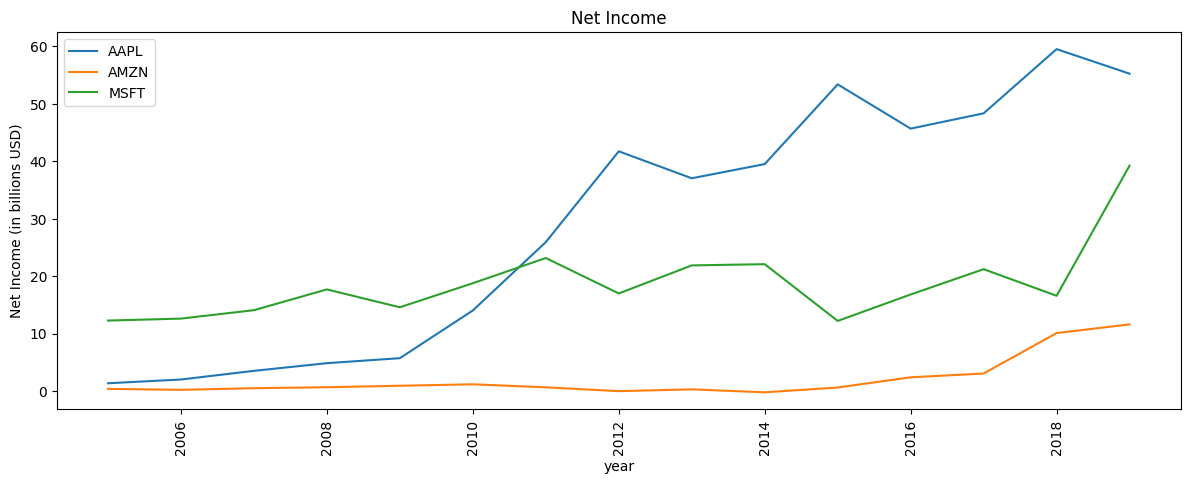

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['netIncome'])
plt.plot(amzn['date'],amzn['netIncome'])
plt.plot(msft['date'],msft['netIncome'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('Net Income')
plt.ylabel('Net Income (in billions USD)')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

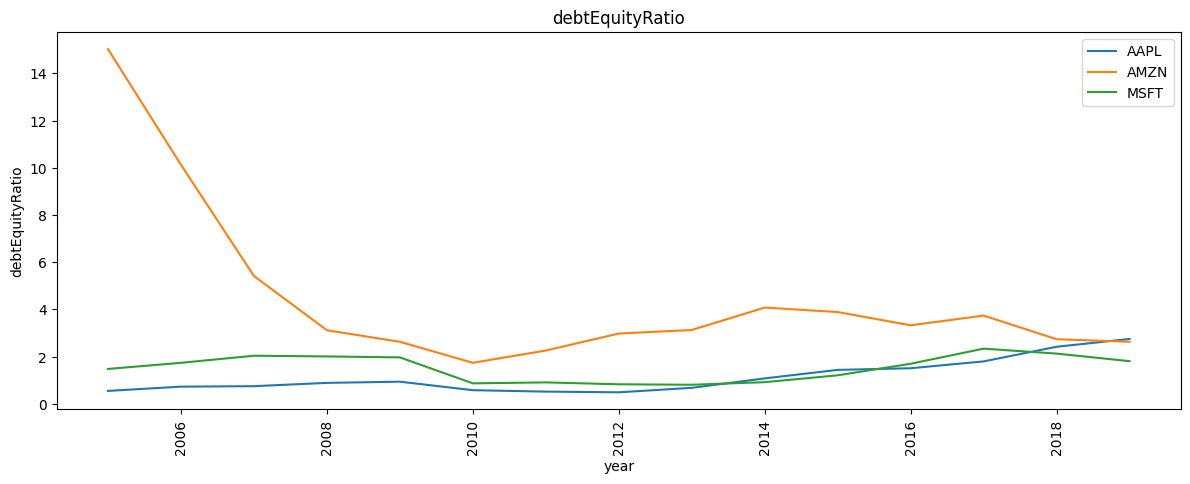

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['debtEquityRatio'])
plt.plot(amzn['date'],amzn['debtEquityRatio'])
plt.plot(msft['date'],msft['debtEquityRatio'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('debtEquityRatio')
plt.ylabel('debtEquityRatio')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

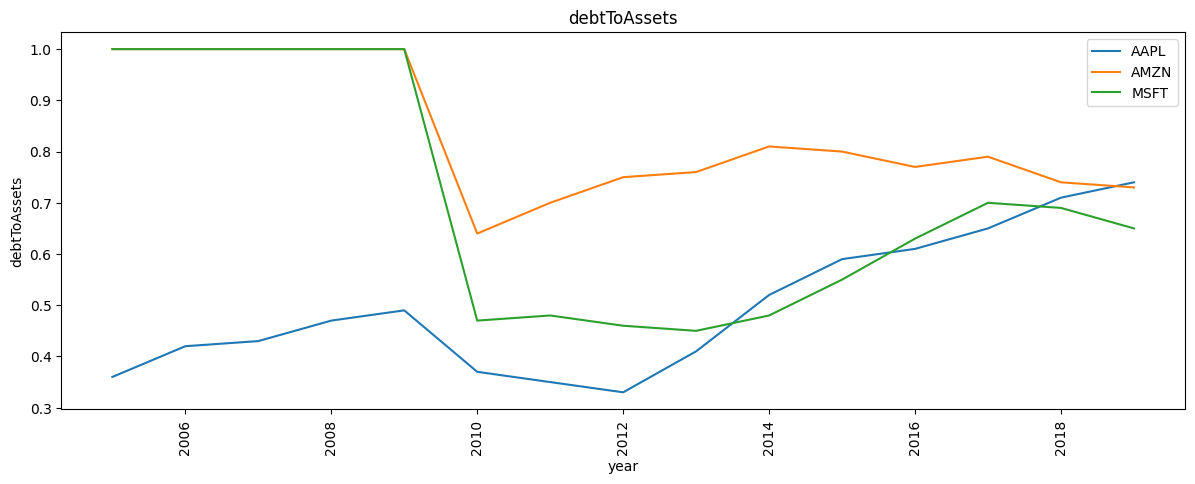

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['debtToAssets'])
plt.plot(amzn['date'],amzn['debtToAssets'])
plt.plot(msft['date'],msft['debtToAssets'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('debtToAssets')
plt.ylabel('debtToAssets')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

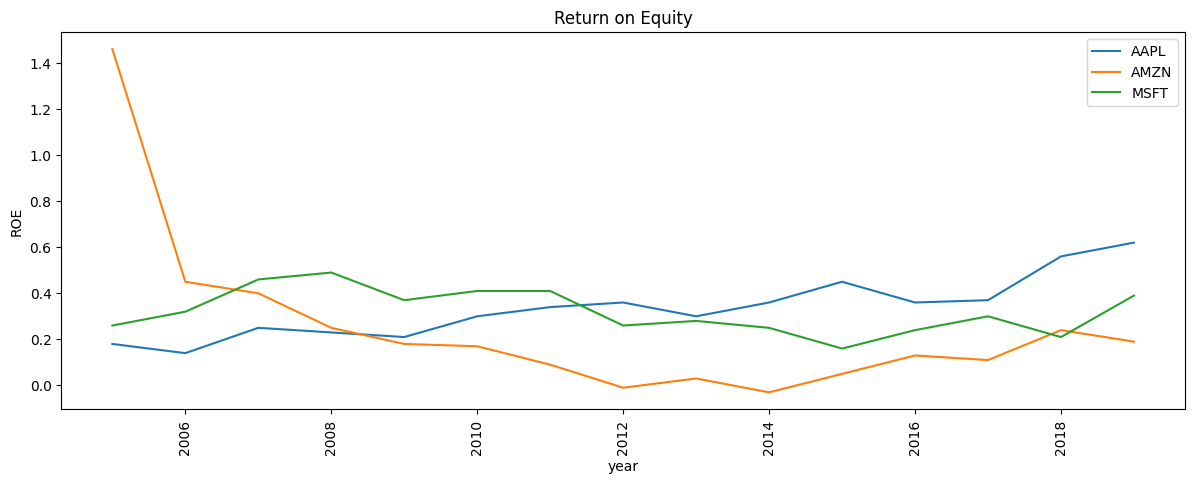

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['ROE'])
plt.plot(amzn['date'],amzn['ROE'])
plt.plot(msft['date'],msft['ROE'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('Return on Equity')
plt.ylabel('ROE')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

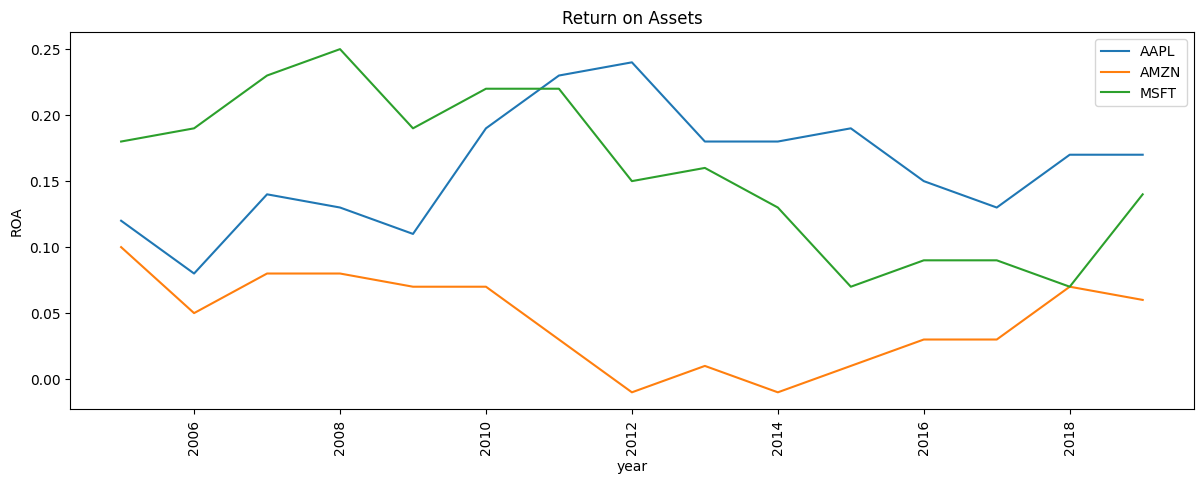

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['ROA'])
plt.plot(amzn['date'],amzn['ROA'])
plt.plot(msft['date'],msft['ROA'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('Return on Assets')
plt.ylabel('ROA')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

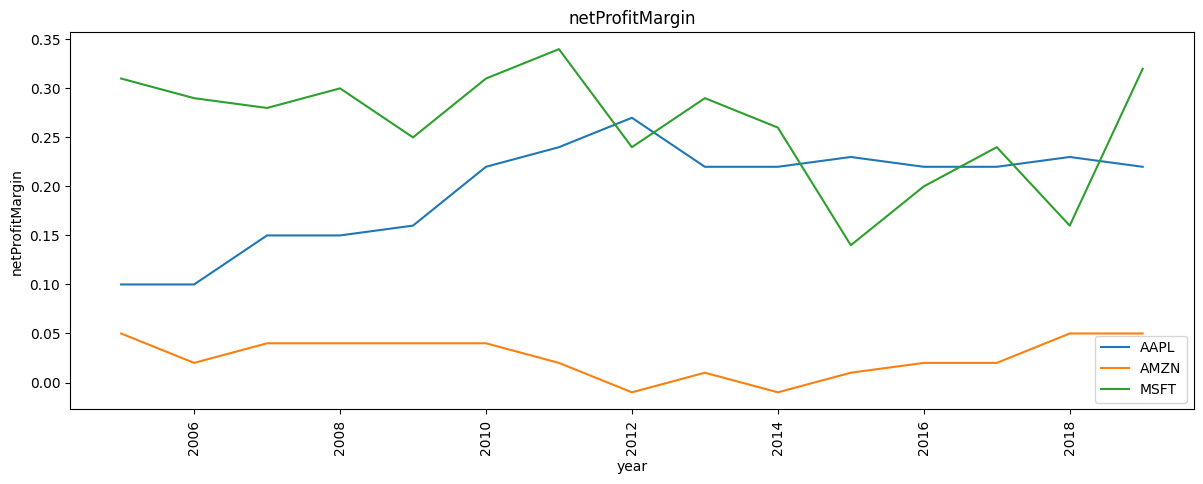

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['netProfitMargin'])
plt.plot(amzn['date'],amzn['netProfitMargin'])
plt.plot(msft['date'],msft['netProfitMargin'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('netProfitMargin')
plt.ylabel('netProfitMargin')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

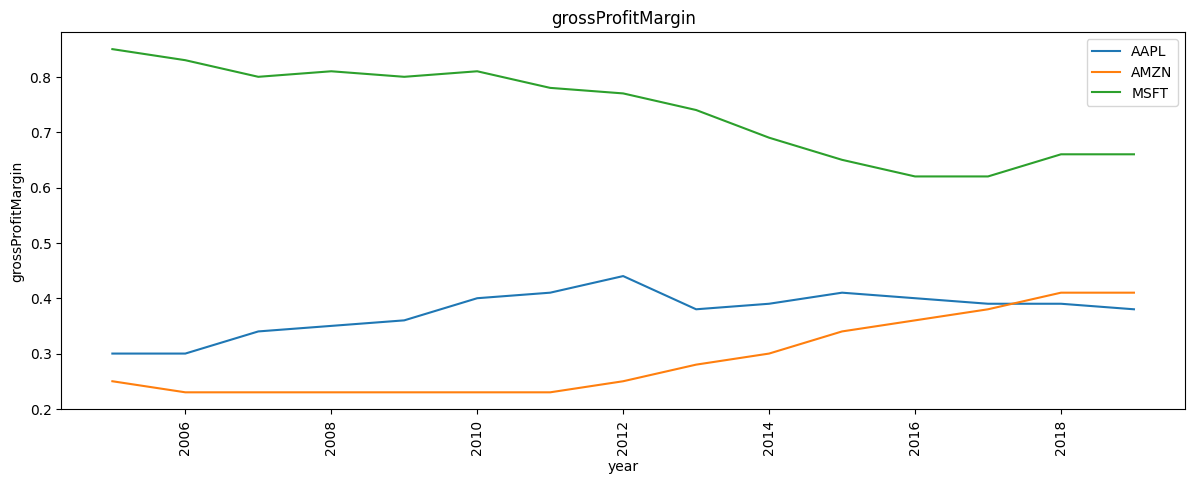

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['grossProfitMargin'])
plt.plot(amzn['date'],amzn['grossProfitMargin'])
plt.plot(msft['date'],msft['grossProfitMargin'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('grossProfitMargin')
plt.ylabel('grossProfitMargin')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

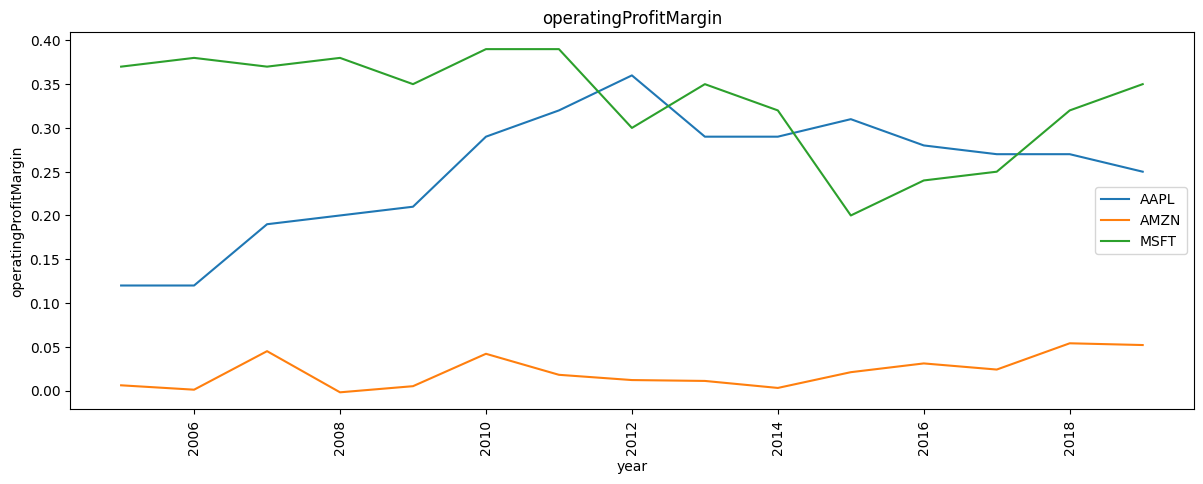

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['operatingProfitMargin'])
plt.plot(amzn['date'],amzn['operatingProfitMargin'])
plt.plot(msft['date'],msft['operatingProfitMargin'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('operatingProfitMargin')
plt.ylabel('operatingProfitMargin')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

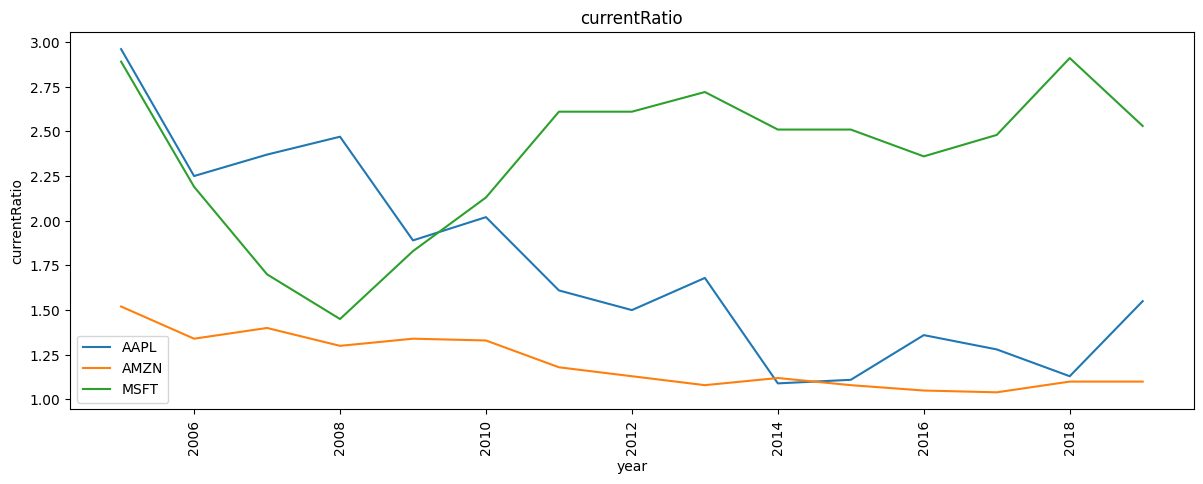

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['currentRatio'])
plt.plot(amzn['date'],amzn['currentRatio'])
plt.plot(msft['date'],msft['currentRatio'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('currentRatio')
plt.ylabel('currentRatio')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

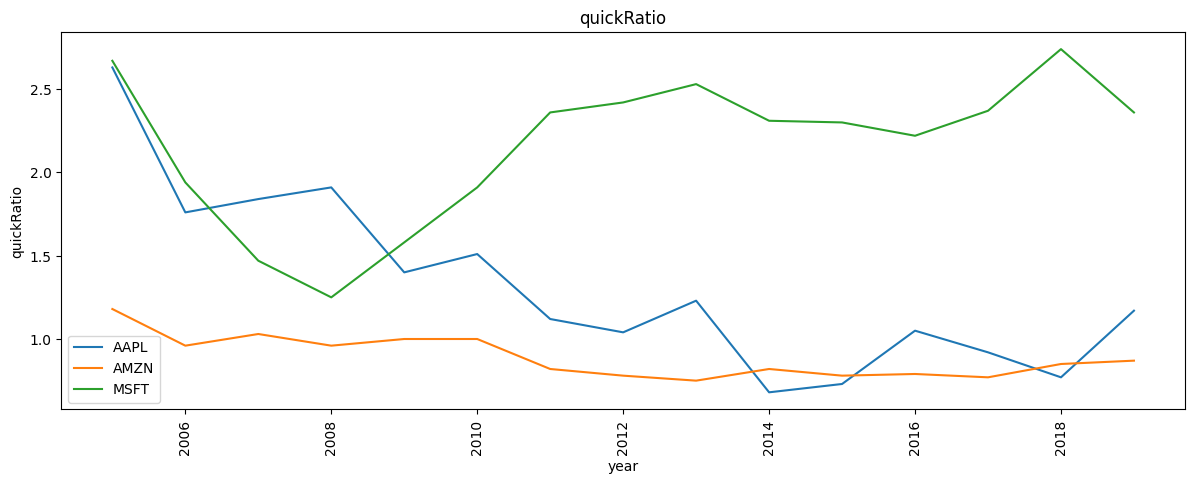

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['quickRatio'])
plt.plot(amzn['date'],amzn['quickRatio'])
plt.plot(msft['date'],msft['quickRatio'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('quickRatio')
plt.ylabel('quickRatio')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

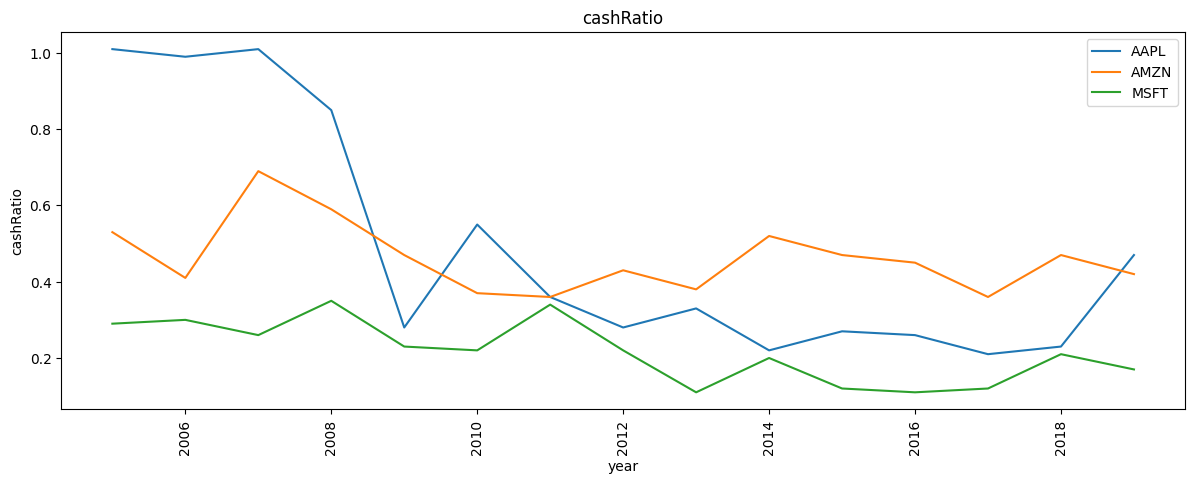

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['cashRatio'])
plt.plot(amzn['date'],amzn['cashRatio'])
plt.plot(msft['date'],msft['cashRatio'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('cashRatio')
plt.ylabel('cashRatio')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

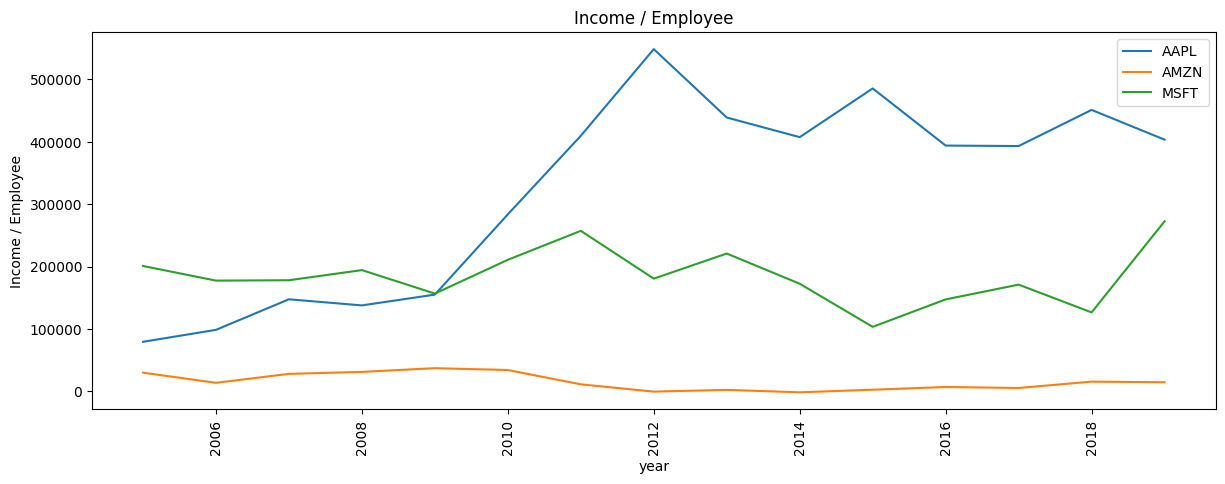

In [0]:
plt.figure(
    figsize=(14.5, 5),
    dpi=100)
plt.plot(aapl['date'],aapl['Income/ Employee'])
plt.plot(amzn['date'],amzn['Income/ Employee'])
plt.plot(msft['date'],msft['Income/ Employee'])
plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('Income / Employee')
plt.ylabel('Income / Employee')
plt.legend(['AAPL','AMZN','MSFT'])
plt.show()

General Statistics

In [0]:
aapl[['currentRatio','ROA','ROE','netIncome', 'netProfitMargin','grossProfitMargin','debtEquityRatio','debtToAssets','quickRatio','cashRatio','Income/ Employee']].describe()

,currentRatio,ROA,ROE,netIncome,netProfitMargin,grossProfitMargin,debtEquityRatio,debtToAssets,quickRatio,cashRatio,Income/ Employee
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.751333,0.160667,0.335333,29.186133,0.196667,0.376000,1.142000,0.496667,1.317333,0.488000,322168.291080
std,0.563089,0.043829,0.132712,21.896430,0.051501,0.039605,0.707078,0.134412,0.535370,0.313419,156429.472606
min,1.090000,0.080000,0.140000,1.335000,0.100000,0.300000,0.490000,0.330000,0.680000,0.210000,79369.797860
25%,1.320000,0.130000,0.240000,5.269000,0.155000,0.355000,0.630000,0.390000,0.980000,0.265000,151255.274262
50%,1.610000,0.170000,0.340000,37.037000,0.220000,0.390000,0.890000,0.470000,1.170000,0.330000,393853.448276
75%,2.135000,0.185000,0.365000,47.019000,0.225000,0.400000,1.475000,0.600000,1.635000,0.700000,424168.641390
max,2.960000,0.240000,0.620000,59.531000,0.270000,0.440000,2.750000,0.740000,2.630000,1.010000,548396.846255


In [0]:
amzn[['currentRatio','ROA','ROE','netIncome', 'netProfitMargin','grossProfitMargin','debtEquityRatio','debtToAssets','quickRatio','cashRatio','Income/ Employee']].describe()

,currentRatio,ROA,ROE,netIncome,netProfitMargin,grossProfitMargin,debtEquityRatio,debtToAssets,quickRatio,cashRatio,Income/ Employee
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.207333,0.044667,0.247333,2.134000,0.026000,0.290667,4.456667,0.832667,0.890667,0.461333,15371.399644
std,0.150308,0.034614,0.362087,3.645886,0.020284,0.070353,3.532597,0.129088,0.124698,0.091875,13388.712266
min,1.040000,-0.010000,-0.030000,-0.241000,-0.010000,0.230000,1.740000,0.640000,0.750000,0.360000,-1563.919533
25%,1.090000,0.020000,0.070000,0.316500,0.015000,0.230000,2.685000,0.745000,0.785000,0.395000,3970.489800
50%,1.130000,0.050000,0.170000,0.631000,0.020000,0.250000,3.130000,0.790000,0.850000,0.450000,13669.064748
75%,1.335000,0.070000,0.245000,1.761500,0.040000,0.350000,3.985000,1.000000,0.980000,0.495000,28958.333333
max,1.520000,0.100000,1.460000,11.588000,0.050000,0.410000,15.030000,1.000000,1.180000,0.690000,37119.341564


In [0]:
msft[['currentRatio','ROA','ROE','netIncome', 'netProfitMargin','grossProfitMargin','debtEquityRatio','debtToAssets','quickRatio','cashRatio','Income/ Employee']].describe()

,currentRatio,ROA,ROE,netIncome,netProfitMargin,grossProfitMargin,debtEquityRatio,debtToAssets,quickRatio,cashRatio,Income/ Employee
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.00000,15.000000,15.000000
mean,2.362000,0.158667,0.320667,18.666600,0.262000,0.739333,1.51800,0.704000,2.16200,0.216667,184661.425343
std,0.427003,0.059626,0.096471,6.767337,0.058334,0.081017,0.54477,0.231387,0.44096,0.080770,44681.592688
min,1.450000,0.070000,0.160000,12.193000,0.140000,0.620000,0.81000,0.450000,1.25000,0.110000,103330.508475
25%,2.160000,0.110000,0.255000,14.317000,0.240000,0.660000,0.91500,0.480000,1.92500,0.145000,163827.956989
50%,2.510000,0.160000,0.300000,16.978000,0.280000,0.770000,1.70000,0.650000,2.31000,0.220000,178037.974684
75%,2.610000,0.205000,0.400000,21.533500,0.305000,0.805000,1.99000,1.000000,2.39500,0.275000,205835.881378
max,2.910000,0.250000,0.490000,39.240000,0.340000,0.850000,2.34000,1.000000,2.74000,0.350000,272500.000000


Variance

In [0]:
aapl[['currentRatio','ROA','ROE','netIncome', 'netProfitMargin','grossProfitMargin','debtEquityRatio','debtToAssets','quickRatio','cashRatio','Income/ Employee']].var()

currentRatio         3.170695e-01
ROA                  1.920952e-03
ROE                  1.761238e-02
netIncome            4.794536e+02
netProfitMargin      2.652381e-03
grossProfitMargin    1.568571e-03
debtEquityRatio      4.999600e-01
debtToAssets         1.806667e-02
quickRatio           2.866210e-01
cashRatio            9.823143e-02
Income/ Employee     2.447018e+10
dtype: float64

Coefficient of Variation

In [0]:
df_coeff = pd.DataFrame({"AAPL":variation(aapl[['currentRatio','ROA','ROE','netIncome', 'netProfitMargin','grossProfitMargin','debtEquityRatio','debtToAssets','quickRatio','cashRatio','Income/ Employee']]), "AMZN":variation(amzn[['currentRatio','ROA','ROE','netIncome', 'netProfitMargin','grossProfitMargin','debtEquityRatio','debtToAssets','quickRatio','cashRatio','Income/ Employee']]),"MSFT":variation(msft[['currentRatio','ROA','ROE','netIncome', 'netProfitMargin','grossProfitMargin','debtEquityRatio','debtToAssets','quickRatio','cashRatio','Income/ Employee']])}).T
df_coeff.columns = ['currentRatio coeff_of_var','ROA COV','ROE COV','netIncome COV', 'netProfitMargin COV','grossProfitMargin COV','debtEquityRatio COV','debtToAssets COV','quickRatio COV','cashRatio COV','Income/ Employee COV']
df_coeff

,currentRatio coeff_of_var,ROA COV,ROE COV,netIncome COV,netProfitMargin COV,grossProfitMargin COV,debtEquityRatio COV,debtToAssets COV,quickRatio COV,cashRatio COV,Income/ Employee COV
AAPL,0.310618,0.263543,0.382341,0.724795,0.252991,0.101761,0.598164,0.261452,0.392624,0.620474,0.469088
AMZN,0.120274,0.748653,1.414321,1.650544,0.753689,0.233832,0.765777,0.149773,0.135258,0.192397,0.841480
MSFT,0.174650,0.363050,0.290644,0.350244,0.215099,0.105866,0.346705,0.317530,0.197043,0.360145,0.233760


In [0]:
df_gross = pd.DataFrame({"AAPL":[aapl['grossProfitMargin'].mean(),aapl['grossProfitMargin'].std(),variation(aapl['grossProfitMargin'])], "AMZN":[amzn['grossProfitMargin'].mean(),amzn['grossProfitMargin'].std(),variation(amzn['grossProfitMargin'])],"MSFT":[msft['grossProfitMargin'].mean(),msft['grossProfitMargin'].std(),variation(msft['grossProfitMargin'])]})
df_gross.index = ['mean','std_deviation','coeff_of_var']
df_gross

,AAPL,AMZN,MSFT
mean,0.376000,0.290667,0.739333
std_deviation,0.039605,0.070353,0.081017
coeff_of_var,0.101761,0.233832,0.105866


In [0]:
df_operating = pd.DataFrame({"AAPL":[aapl['operatingProfitMargin'].mean(),aapl['operatingProfitMargin'].std(),variation(aapl['operatingProfitMargin'])], "AMZN":[amzn['operatingProfitMargin'].mean(),amzn['operatingProfitMargin'].std(),variation(amzn['operatingProfitMargin'])],"MSFT":[msft['operatingProfitMargin'].mean(),msft['operatingProfitMargin'].std(),variation(msft['operatingProfitMargin'])]})
df_operating.index = ['mean','std_deviation','coeff_of_var']
df_operating

,AAPL,AMZN,MSFT
mean,0.251333,0.021533,0.330667
std_deviation,0.069986,0.019078,0.059217
coeff_of_var,0.269018,0.855946,0.173012


In [0]:
df_net = pd.DataFrame({"AAPL":[aapl['netProfitMargin'].mean(),aapl['netProfitMargin'].std(),variation(aapl['netProfitMargin'])], "AMZN":[amzn['netProfitMargin'].mean(),amzn['netProfitMargin'].std(),variation(amzn['netProfitMargin'])],"MSFT":[msft['netProfitMargin'].mean(),msft['netProfitMargin'].std(),variation(msft['netProfitMargin'])]})
df_net.index = ['mean','std_deviation','coeff_of_var']
df_net

,AAPL,AMZN,MSFT
mean,0.196667,0.026000,0.262000
std_deviation,0.051501,0.020284,0.058334
coeff_of_var,0.252991,0.753689,0.215099


In [0]:
df_roe = pd.DataFrame({"AAPL":[aapl['ROE'].mean(),aapl['ROE'].std(),variation(aapl['ROE'])], "AMZN":[amzn['ROE'].mean(),amzn['ROE'].std(),variation(amzn['ROE'])],"MSFT":[msft['ROE'].mean(),msft['ROE'].std(),variation(msft['ROE'])]})
df_roe.index = ['mean','std_deviation','coeff_of_var']
df_roe

,AAPL,AMZN,MSFT
mean,0.335333,0.247333,0.320667
std_deviation,0.132712,0.362087,0.096471
coeff_of_var,0.382341,1.414321,0.290644


In [0]:
var = 'ROA'
df_roa = pd.DataFrame({"AAPL":[aapl[var].mean(),aapl[var].std(),variation(aapl[var])], "AMZN":[amzn[var].mean(),amzn[var].std(),variation(amzn[var])],"MSFT":[msft[var].mean(),msft[var].std(),variation(msft[var])]})
df_roa.index = ['mean','std_deviation','coeff_of_var']
df_roa

,AAPL,AMZN,MSFT
mean,0.160667,0.044667,0.158667
std_deviation,0.043829,0.034614,0.059626
coeff_of_var,0.263543,0.748653,0.363050


In [0]:
var = 'debtEquityRatio'
df_dte = pd.DataFrame({"AAPL":[aapl[var].mean(),aapl[var].std(),variation(aapl[var])], "AMZN":[amzn[var].mean(),amzn[var].std(),variation(amzn[var])],"MSFT":[msft[var].mean(),msft[var].std(),variation(msft[var])]})
df_dte.index = ['mean','std_deviation','coeff_of_var']
df_dte

,AAPL,AMZN,MSFT
mean,1.142000,4.456667,1.518000
std_deviation,0.707078,3.532597,0.544770
coeff_of_var,0.598164,0.765777,0.346705


In [0]:
var = 'debtToAssets'
df_dta = pd.DataFrame({"AAPL":[aapl[var].mean(),aapl[var].std(),variation(aapl[var])], "AMZN":[amzn[var].mean(),amzn[var].std(),variation(amzn[var])],"MSFT":[msft[var].mean(),msft[var].std(),variation(msft[var])]})
df_dta.index = ['mean','std_deviation','coeff_of_var']
df_dta

,AAPL,AMZN,MSFT
mean,0.496667,0.832667,0.704000
std_deviation,0.134412,0.129088,0.231387
coeff_of_var,0.261452,0.149773,0.317530


In [0]:
var = 'currentRatio'
df_cR = pd.DataFrame({"AAPL":[aapl[var].mean(),aapl[var].std(),variation(aapl[var])], "AMZN":[amzn[var].mean(),amzn[var].std(),variation(amzn[var])],"MSFT":[msft[var].mean(),msft[var].std(),variation(msft[var])]})
df_cR.index = ['mean','std_deviation','coeff_of_var']
df_cR

,AAPL,AMZN,MSFT
mean,1.751333,1.207333,2.362000
std_deviation,0.563089,0.150308,0.427003
coeff_of_var,0.310618,0.120274,0.174650


In [0]:
var = 'quickRatio'
df_qR = pd.DataFrame({"AAPL":[aapl[var].mean(),aapl[var].std(),variation(aapl[var])], "AMZN":[amzn[var].mean(),amzn[var].std(),variation(amzn[var])],"MSFT":[msft[var].mean(),msft[var].std(),variation(msft[var])]})
df_qR.index = ['mean','std_deviation','coeff_of_var']
df_qR

,AAPL,AMZN,MSFT
mean,1.317333,0.890667,2.162000
std_deviation,0.535370,0.124698,0.440960
coeff_of_var,0.392624,0.135258,0.197043


In [0]:
var = 'cashRatio'
df_cashR = pd.DataFrame({"AAPL":[aapl[var].mean(),aapl[var].std(),variation(aapl[var])], "AMZN":[amzn[var].mean(),amzn[var].std(),variation(amzn[var])],"MSFT":[msft[var].mean(),msft[var].std(),variation(msft[var])]})
df_cashR.index = ['mean','std_deviation','coeff_of_var']
df_cashR

,AAPL,AMZN,MSFT
mean,0.488000,0.461333,0.216667
std_deviation,0.313419,0.091875,0.080770
coeff_of_var,0.620474,0.192397,0.360145


Save Ratios to Excel

In [0]:
(aapl[['date','ROA','ROE']].T).to_excel('new.xlsx')

In [0]:
(amzn[['date','ROA','ROE']].T).to_excel('new1.xlsx')

In [0]:
(msft[['date','ROA','ROE']].T).to_excel('new2.xlsx')